14.1

Przeprowadź Analizę Składowych Głównych (PCA) na zbiorze danych o winach.

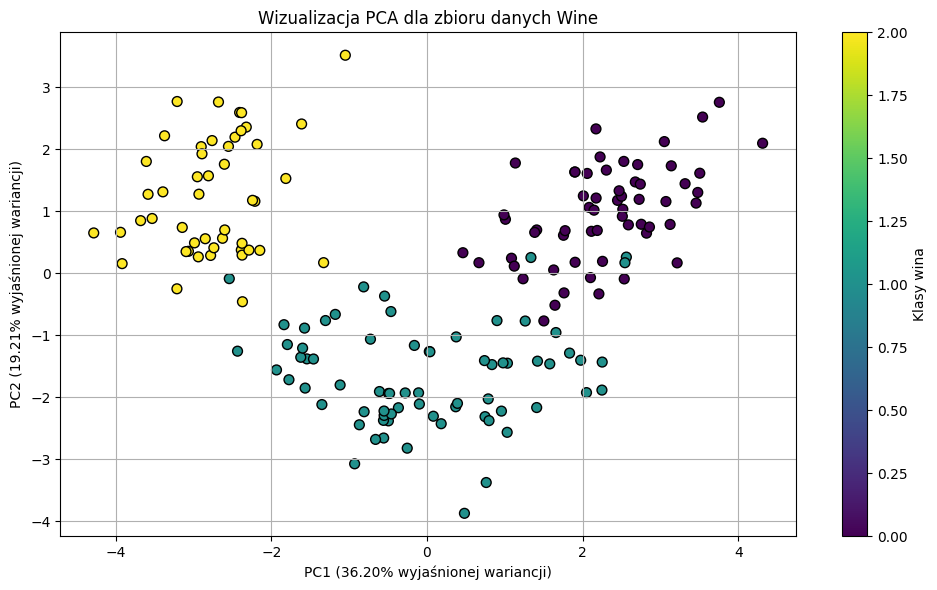

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
PC1,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
PC2,0.483652,0.224931,0.316069,-0.010591,0.299634,0.065040,-0.003360,0.028779,0.039302,0.529996,-0.279235,-0.164496,0.364903


In [ ]:
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# 1. Wczytanie zbioru danych o winach
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names

# 2. Standaryzacja danych
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Przeprowadzenie PCA
pca = PCA(n_components=2)  # Redukcja do 2 wymiarĂłw dla wizualizacji
X_pca = pca.fit_transform(X_scaled)

# 4. Obliczenie wyjaśnionej  wariancji
explained_variance = pca.explained_variance_ratio_

# 5. Tworzenie wykresu PCA
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel(f'PC1 ({explained_variance[0]*100:.2f}% wyjaĹnionej wariancji)')
plt.ylabel(f'PC2 ({explained_variance[1]*100:.2f}% wyjaĹnionej wariancji)')
plt.title('Wizualizacja PCA dla zbioru danych Wine')
plt.colorbar(scatter, label='Klasy wina')
plt.grid()
plt.tight_layout()
plt.show()

# 6. Wyświetlenie komponentów PCA
pca_components = pd.DataFrame(pca.components_, columns=feature_names, index=['PC1', 'PC2'])
pca_components

14.2

Przeprowadź analizę struktury zbioru danych dotyczącego samochodów  za pomocą algorytmu t-SNE.

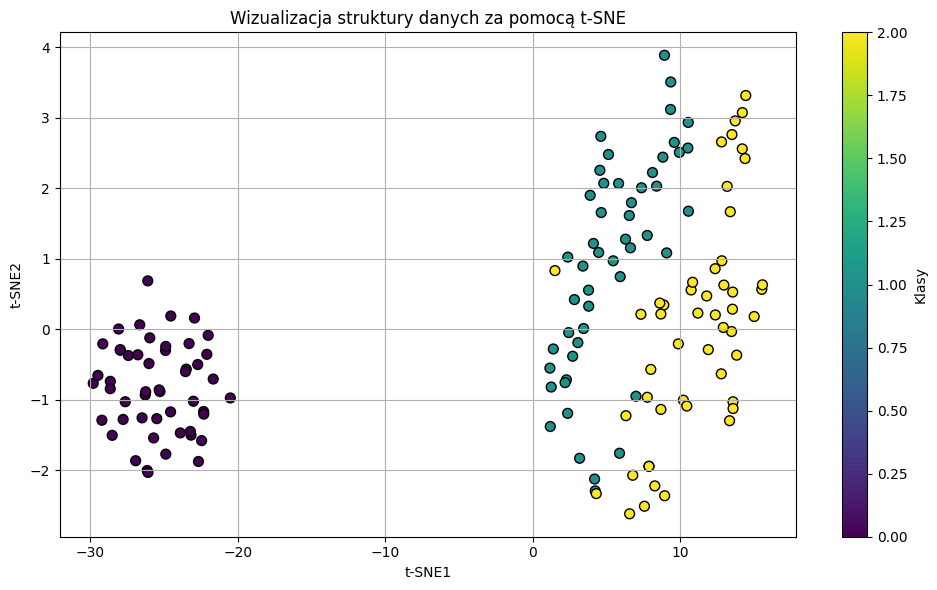

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Przygotowanie danych (przykładowy zbiór danych, należy podmienić na 'vehicles')
from sklearn.datasets import load_iris  # Zamień na rzeczywisty zbiór 'load_vehicles'
data = load_iris()  # Zamień na 'load_vehicles()'
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# 1. Standaryzacja danych
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Przeprowadzenie t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# 3. Wizualizacja wyników
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.colorbar(scatter, label='Klasy')
plt.title('Wizualizacja struktury danych za pomocą t-SNE')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.grid()
plt.tight_layout()
plt.show()

14.3

Dla zbioru danych dotyczącego cukrzycy (load_diabetes) dostępny w bibliotece scikit-learn, stwórz model regresji przy użyciu xgBoost, który przewiduje progresję choroby na podstawie różnych cech pacjentów.

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# 1. Wczytanie danych
data = load_diabetes()
X = data.data
y = data.target

# 2. Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Tworzenie i trening modelu XGBoost
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# 4. Predykcja
y_pred = xgb_model.predict(X_test)

# 5. Obliczanie błędu średniokwadratowego (MSE)
mse = mean_squared_error(y_test, y_pred)

mse

3513.659206003472

14.4

Wytrenuj klasyfikator xgboost na syntetycznym zbiorze danych i porównaj go z Random Forest (na tych samych parametrach).

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Tworzenie syntetycznego zbioru danych
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# 2. Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Tworzenie i trenowanie modelu XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# 4. Tworzenie i trenowanie modelu Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 5. Predykcja na zbiorze testowym
y_pred_xgb = xgb_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# 6. Obliczanie dokładności
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

accuracy_xgb, accuracy_rf

(0.8966666666666666, 0.8566666666666667)